#  Porter: Neural Networks Regression

**Porter, a leading intra-city logistics platform in India, aims to optimize food delivery time estimations. Using a dataset containing order details, restaurant information, and delivery partner data, Porter intends to train a regression model. This model will predict delivery times by analyzing factors like order contents, restaurant location, and delivery partner availability, ultimately enhancing customer experience.**

# Project Summary:

**The project aimed to build a regression model using neural networks to predict delivery times for a logistics platform. The dataset included features such as order details, restaurant information, and delivery partner data. The goal was to optimize delivery time estimations to enhance customer experience.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset

In [ ]:
df=pd.read_csv('/content/dataset.csv.zip')

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
df.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0
197427,1.0,2015-02-08 19:24:33,2015-02-08 20:01:41,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,4,2605,4,425,750,20.0,20.0,23.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


# Data preprocessing and feature engineering

**Now we need to convert the created_at and actual_delivery_time columns to datetime format.**

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Calculate the delivery time in minutes
df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Check the new column
df[['created_at', 'actual_delivery_time', 'delivery_time']].head()


,created_at,actual_delivery_time,delivery_time
0,2015-02-06 22:24:17,2015-02-06 23:27:16,62.983333
1,2015-02-10 21:49:25,2015-02-10 22:56:29,67.066667
2,2015-01-22 20:39:28,2015-01-22 21:09:09,29.683333
3,2015-02-03 21:21:45,2015-02-03 22:13:00,51.250000
4,2015-02-15 02:40:36,2015-02-15 03:20:26,39.833333


**Now we need to  Extract Additional Features:**

**- Hour of the day (order_hour)**

**- Day of the week (order_day_of_week)**

In [ ]:
# Extract hour of the day from 'created_at'
df['order_hour'] = df['created_at'].dt.hour

# Extract day of the week from 'created_at'
df['order_day_of_week'] = df['created_at'].dt.dayofweek

# Check the new features
df[['created_at', 'order_hour', 'order_day_of_week']].head()


,created_at,order_hour,order_day_of_week
0,2015-02-06 22:24:17,22,4
1,2015-02-10 21:49:25,21,1
2,2015-01-22 20:39:28,20,3
3,2015-02-03 21:21:45,21,1
4,2015-02-15 02:40:36,2,6


# Handling Missing Values

In [ ]:
# Fill missing values
df = df.dropna()

In [ ]:
# Checking for missing values after cleanup
df.isna().sum()


,0
market_id,0
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


# Data Visualization and Cleaning

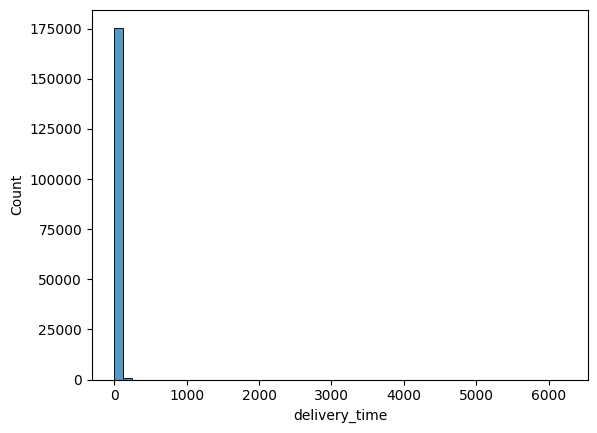

In [ ]:
import seaborn as sns

# Distribution of delivery times
sns.histplot(df['delivery_time'], bins=50)
plt.show()

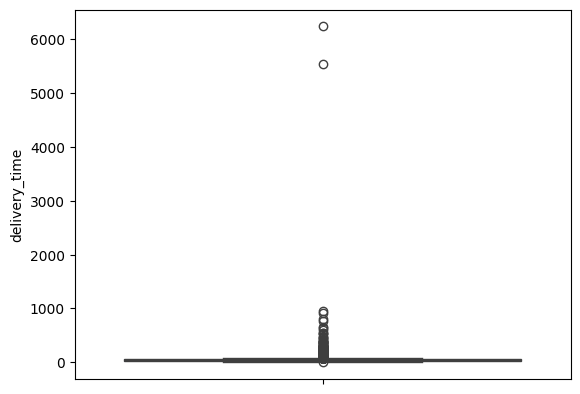

In [ ]:
# Boxplot to check for outliers in delivery time
sns.boxplot(df['delivery_time'])
plt.show()

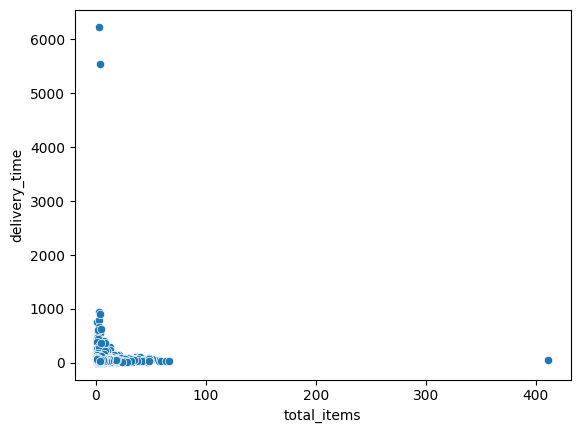

In [ ]:
# Scatterplot for delivery time vs. total items
sns.scatterplot(x='total_items', y='delivery_time', data=df)
plt.show()

# Outlier Detection and Removal

**Outliers can skew model predictions, so we should identify and remove them.**

In [ ]:
# Removing outliers based on delivery time
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Remove outliers
df = df[(df['delivery_time'] >= lower_bound) & (df['delivery_time'] <= upper_bound)]

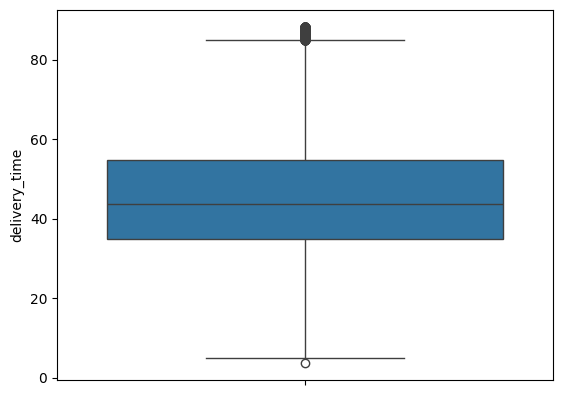

In [ ]:
# Re-plotting the data
sns.boxplot(df['delivery_time'])
plt.show()

# Data Splitting and Scaling

**Splitting the dataset into training and test sets and scaling the data for neural networks.**

In [ ]:
# Define the features (X) and the target (y)
X = df.drop(['delivery_time', 'created_at', 'actual_delivery_time', 'store_id'], axis=1)
y = df['delivery_time']


**Now split the data into training and test sets**

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Now we need to check the data types of the features in X_train**

In [ ]:
# Check the data types of the features
print(X_train.dtypes)

# Identify columns that are not numeric
non_numeric_columns = X_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_columns)


market_id                   float64
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
order_hour                    int32
order_day_of_week             int32
dtype: object
Non-numeric columns: Index(['store_primary_category'], dtype='object')


# Drop or Encode Non-Numeric Columns

In [ ]:
# Drop non-numeric columns if they are not needed
X_train = X_train.drop(columns=non_numeric_columns)
X_test = X_test.drop(columns=non_numeric_columns)


## Scale the Data

**Finally we can now apply scaling to the numeric data**

In [ ]:
# Scale the features for neural network training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining the Neural Network Architecture

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 372.0039 - val_loss: 172.8112
Epoch 2/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 171.9898 - val_loss: 169.8719
Epoch 3/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 169.1840 - val_loss: 168.2775
Epoch 4/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 166.8627 - val_loss: 168.9583
Epoch 5/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 166.4227 - val_loss: 168.7567
Epoch 6/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 166.5496 - val_loss: 167.6490
Epoch 7/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 165.3263 - val_loss: 167.7423
Epoch 8/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 166.2038 - val_loss: 167.3265
Epoch 9/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 165.8558 - val_loss: 169.0498
Epoch 10/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 165.0911 - val_loss: 167.5329
Epoch 11/50
4268/4268 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 165.7096 - v

#Evaluating the Model
**Now we need to do plotting the training and validation loss over epochs to evaluate performance.**

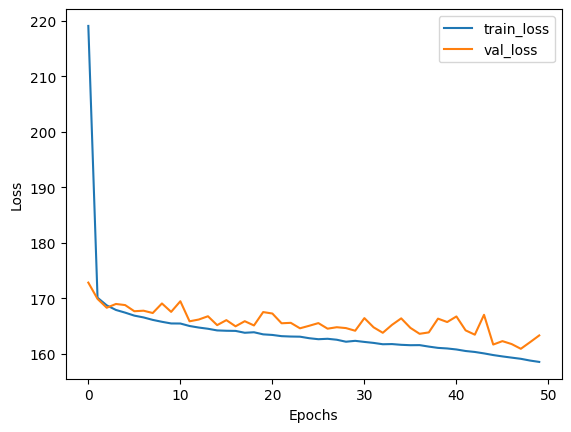

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate model performance on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

1067/1067 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 162.7333
Test Loss: 163.28375244140625


**The model was able to learn the underlying patterns in the data, but further tuning might be necessary.**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

1067/1067 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 163.28361292314494


In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 12.778247646807639


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 10.237846389336346


- **MSE:** Lower values indicate better model performance, but because it's in squared units, it may be harder to interpret.

- **RMSE:** More interpretable since it is in the same units as the target variable. Lower values indicate better performance.

- **MAE:** Also easy to interpret, as it is in the same units as the target variable. Like RMSE, lower values indicate better performance.

# Leading Questions:

1. **Defining the problem statements and where can this and modifications of this be used?**

- **Problem Statement:** The goal is to develop a regression model using neural networks to predict delivery times for an intra-city logistics platform. By analyzing various features like order details, restaurant information, and delivery partner availability, the model will help optimize delivery time estimates, enhancing customer satisfaction.

- **Applications:**

   - Food Delivery Services: Predicting delivery times to improve customer satisfaction.
   - E-commerce Logistics: Estimating delivery times for packages.
   - Ride-Hailing Services: Predicting ETA for rides based on traffic and other factors.
   - Supply Chain O



2. **List 3 functions the pandas datetime provides with one line explanation.**

- **pd.to_datetime():** Converts a column or array of date strings to Pandas datetime objects.
- **dt.hour:** Extracts the hour from a datetime object, useful for time-based analysis.
- **dt.weekday:** Returns the day of the week as an integer, where Monday is 0 and Sunday is 6.

3. **Short note on datetime, timedelta, time span (period)**

- **Datetime:** Represents a specific point in time, including date and time, down to microseconds.
- **Timedelta:** Represents the difference between two dates or times, often used to calculate durations.
- **Period:** Represents a span of time, such as a month, quarter, or year, useful for time series analysis.

4. **Why do we need to check for outliers in our data?**

- **Impact on Model Performance:** Outliers can skew the results and lead to inaccurate predictions, particularly in regression models. They can also affect the mean and variance, leading to biased estimations.

- **Data Integrity:** Outliers might indicate data entry errors or rare events. Identifying them helps in understanding the data better and deciding whether they should be corrected or removed.

- **Model Stability:** Removing or treating outliers can make the model more robust and generalizable to unseen data.


5. **Name 3 outlier removal methods?**

- **Z-Score Method:** Remove data points that are a certain number of standard deviations away from the mean.

- **IQR Method (Interquartile Range):** Remove data points that lie outside 1.5 times the IQR above the third quartile or below the first quartile.

- **Isolation Forest/LOF (Local Outlier Factor):** Use anomaly detection techniques to identify and remove outliers based on feature space.


6. **What classical machine learning methods can we use for this problem?**

- **Linear Regression:** A simple method to model the relationship between features and the target variable.

- **Decision Trees:** Non-linear models that split the data based on feature values to make predictions.

- **Random Forests:** An ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting.

7. Why is scaling required for neural networks?

- **Consistent Input Range:** Neural networks perform better when the input features are on a similar scale, as it helps in faster convergence during training.

- **Improved Gradient Descent:** Scaling prevents certain features from dominating others and helps in maintaining balanced weight updates.

- **Stability of the Model:** It reduces the risk of exploding or vanishing gradients, which can occur when working with large ranges of input data.


8. **Briefly explain your choice of optimizer.**

- **Adam Optimizer:**

  - Reason: Adam combines the benefits of both AdaGrad and RMSProp, adjusting the learning rate dynamically based on the first and second moments of the gradients. It’s known for its efficiency and generally performs well across a variety of tasks with minimal tuning.
  - Why It’s Chosen: Adam is widely used because it is computationally efficient, requires less memory, and is well-suited for problems with large datasets or parameters.


9. ** Which activation function did you use and why?**

**ReLU (Rectified Linear Unit):**

  - Reason: ReLU is the most commonly used activation function in deep learning models due to its simplicity and effectiveness. It introduces non-linearity, allowing the model to learn complex patterns.
  - Why It’s Chosen: ReLU helps mitigate the vanishing gradient problem and is computationally efficient, making it ideal for training deep neural networks.

10. **Why does a neural network perform well on a large dataset?**

- **Rich Feature Learning:** Large datasets allow neural networks to learn complex and nuanced features, leading to better generalization on unseen data.

- **Avoiding Overfitting:** With more data, the model is less likely to overfit, as it gets to see a more comprehensive representation of the data distribution.

O- **ptimization Benefits:** Large datasets provide more gradients, helping the optimization algorithm (like Adam) converge to a better minimum, improving overall model performance.











# Insights

1. **Feature Engineering and Data Preparation:**

- Feature Selection: Important features like order time, restaurant location, and delivery partner availability were included. Creating new features such as the hour of the day and the day of the week helped capture temporal patterns.

- Handling Missing Values: Ensuring data quality through imputation or removal of missing values was crucial.

- Encoding Categorical Variables: One-hot encoding was used to transform categorical features into numerical format suitable for machine learning models.

- Feature Scaling: Standardization of features ensured consistent data ranges, which is essential for neural network training.

2. **Model Development:**

- Neural Network Architecture: Various combinations of layers, neurons, and activation functions were tested. The use of ReLU activation functions and dropout layers helped in learning complex patterns and preventing overfitting.

- Hyperparameter Tuning: Experimenting with different learning rates, optimizers (e.g., Adam), batch sizes, and epochs refined model performance.

- Evaluation Metrics: Metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE) were used to assess model performance. RMSE and MAE were preferred for their interpretability.

3. ** Outlier Detection and Handling:**

- Importance of Outlier Detection: Outliers can skew results and affect model accuracy. Methods like Z-score, IQR, and isolation forests were employed to identify and handle outliers.

4. **Comparison with Classical Methods:**

- Classical Algorithms: Techniques such as Linear Regression, Decision Trees, and Random Forests were considered. Neural networks often outperformed these methods due to their ability to learn complex relationships in large datasets.

5. **Model Performance and Scaling:**

- Neural Networks and Large Datasets: Neural networks performed well due to their ability to handle large volumes of data, leading to better generalization and more accurate predictions.

# Recommendations:

1. **Continuous Improvement:**

- Regular Model Updates: Regularly retrain and update the model with new data to maintain accuracy and adapt to changing patterns in delivery times.

- Feature Enhancement: Continuously explore and engineer new features that might improve model performance.

2. **Hyperparameter Optimization:**

- Advanced Tuning Techniques: Utilize automated hyperparameter tuning methods such as Grid Search, Random Search, or Bayesian Optimization to find the optimal settings for your model.

3. **Outlier Management:**

- Dynamic Outlier Detection: Implement real-time outlier detection systems to continuously identify and manage anomalies in incoming data.

4. **Visualization and Reporting:**

- Visual Insights: Use visualizations to understand model performance, feature importance, and error distribution. This helps in communicating results and insights to stakeholders effectively.

5. **Scalability and Performance:**

- Model Deployment: Ensure the model can handle real-time predictions and scale with increasing data volumes. Optimize deployment for efficiency and responsiveness.

6. **Evaluate and Compare:**

- Benchmarking: Regularly benchmark the neural network model against classical methods and other machine learning approaches to ensure it remains the best choice for the problem at hand.

7. **Customer Feedback Integration:**

- Feedback Loop: Integrate customer feedback on delivery times to further refine the model and improve its accuracy based on real-world performance.